In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('predictive_maintenance.csv')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


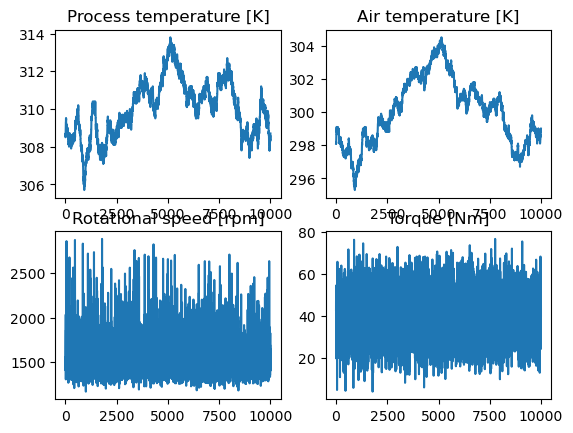

In [15]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(data["Process temperature [K]"])
ax1.set_title("Process temperature [K]")

ax2.plot(data["Air temperature [K]"])
ax2.set_title("Air temperature [K]")

ax3.plot(data["Rotational speed [rpm]"])
ax3.set_title("Rotational speed [rpm]")

ax4.plot(data["Torque [Nm]"])
ax4.set_title("Torque [Nm]")

plt.show()

In [19]:
target = data["Target"]
target.unique()

array([0, 1], dtype=int64)

In [21]:
train_data = data[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]"]]
train_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,298.1,308.6,1551,42.8
1,298.2,308.7,1408,46.3
2,298.1,308.5,1498,49.4
3,298.2,308.6,1433,39.5
4,298.2,308.7,1408,40.0


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, target)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
tree.score(X_test, y_test)

0.9656